In [ ]:
import pandas as pd
import numpy as np
import gzip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
images_path = "/content/drive/My Drive/Colab Notebooks/mnist fashion/train-images-idx3-ubyte.gz"
labels_path = "/content/drive/My Drive/Colab Notebooks/mnist fashion/train-labels-idx1-ubyte.gz"

In [ ]:
with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

In [ ]:
images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
# Subset first 20k data points to visualize
x_subset = images[0:20000]
y_subset = labels[0:20000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 1.1308724880218506 seconds


In [ ]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.29021329 0.1778743  0.06015076 0.04975864]


(<Figure size 576x576 with 1 Axes>,
 [Text(774.449766423101, -689.6949155407971, '0'),
  Text(42.86381925871669, -1429.3643908753609, '1'),
  Text(1098.2843326495085, 376.9753233177327, '2'),
  Text(329.2719860676822, -1111.4898090892539, '3'),
  Text(1266.9709868265702, 295.46620087957507, '4'),
  Text(-1589.557323392493, 61.8677338863487, '5'),
  Text(713.4727983677675, -65.68701120578022, '6'),
  Text(-1521.4109429495004, 335.66562534099404, '7'),
  Text(63.81768171729525, 1003.3250404334239, '8'),
  Text(-645.6906091257392, 1168.2384038952237, '9')])

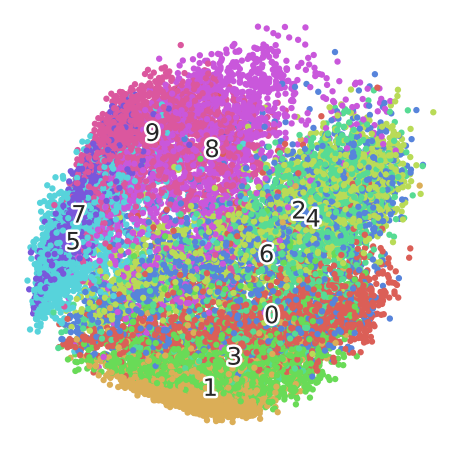

In [ ]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

In [ ]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 945.5740134716034 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(41.519543, 6.2158065, '0'),
  Text(16.503407, 61.117332, '1'),
  Text(13.98172, -39.081573, '2'),
  Text(23.601368, 24.037092, '3'),
  Text(31.923283, -32.924557, '4'),
  Text(-36.77939, 5.288479, '5'),
  Text(16.949478, -17.389828, '6'),
  Text(-59.46676, -11.188857, '7'),
  Text(-22.60891, -37.143707, '8'),
  Text(-34.67833, 39.370636, '9')])

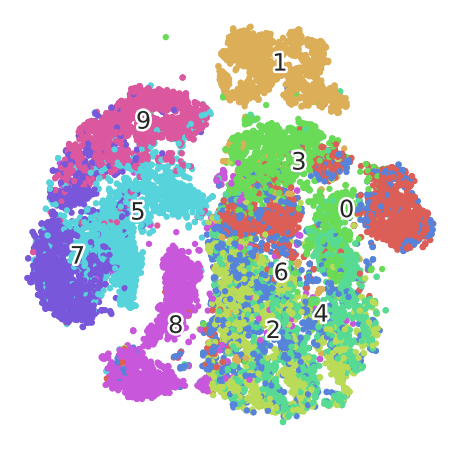

In [ ]:
fashion_scatter(fashion_tsne, y_subset)

In [ ]:
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print ('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 2.20697283744812 seconds
Cumulative variance explained by 50 principal components: 0.8625050893595234


In [ ]:
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 191.1130232810974 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(5.2457767, 19.350245, '0'),
  Text(29.502632, 56.63255, '1'),
  Text(18.320637, -41.677773, '2'),
  Text(51.696987, 16.747961, '3'),
  Text(33.83445, -35.938103, '4'),
  Text(-36.297863, 5.3032417, '5'),
  Text(13.852079, -19.507324, '6'),
  Text(-61.192993, -13.06356, '7'),
  Text(-20.118155, -34.218914, '8'),
  Text(-38.333977, 45.27806, '9')])

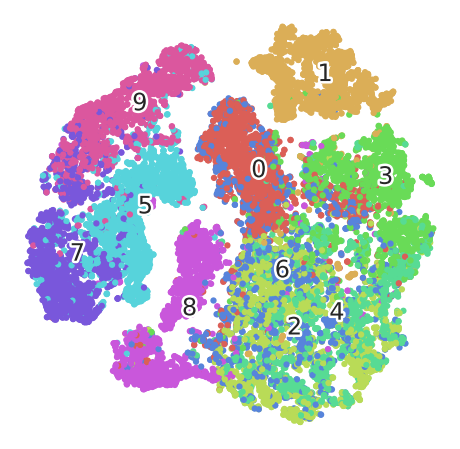

In [ ]:
fashion_scatter(fashion_pca_tsne, y_subset)